In [35]:
from distance_calculation import Distance
from sequence_processing import trim
from sklearn import manifold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline

# Analyzing North American strains collected in 2012 with PAM250

In [23]:
D_2012_PAM = Distance("NA_2012_aligned_seq.fa", "PAM250")
labels_2012, sequences_2012 = trim("NA_2012_aligned_seq.fa")

using path from server to load sequences
using path from server to load sequences


In [24]:
test = D_2012_PAM.seq_dist(sequences_2012[0], sequences_2012[1])
print(test)

numSeq_2012 = sequences_2012.shape[0]

0.008014535706162963


In [25]:
distMat_2012 = D_2012_PAM.dist_mat()

calculating the full distance matrix based on PAM250


stress: 6.36904221477824


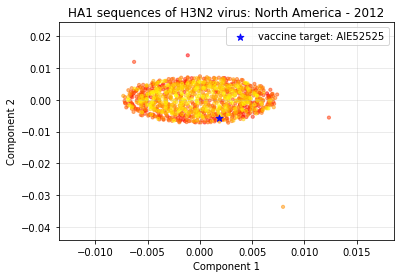

In [52]:
mds = manifold.MDS(n_components=2, max_iter=8000, dissimilarity="precomputed", n_jobs=1)

results = mds.fit(distMat_2012)
pos = results.embedding_
stress = results.stress_
print('stress: ' +str(stress))

cmap = mpl.cm.autumn # more options found here: https://matplotlib.org/tutorials/colors/colormaps.html
autumn_map = plt.get_cmap('autumn')
color_array = np.zeros((numSeq_2012,4))
for ii in range(0,numSeq_2012):
    color_array[ii,:] = cmap(ii / float(numSeq_2012))

pts = plt.scatter(pos[:, 0], pos[:, 1], color=color_array, cmap=autumn_map, s=10, alpha=0.5)
plt.scatter(pos[1, 0], pos[1, 1], color='b', marker='*', s=50, alpha=0.9, label=('vaccine target: ' + str(labels[1])))

plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(alpha=0.3)
plt.title('HA1 sequences of H3N2 virus: North America - 2012 - PAM250')
#plt.colorbar(pts)
#plt.colors.Colormap(labels, N=10)
plt.show()


Sequences are colored based on time they are collected on a scale in which red points represent sequences collected early in the year and yellow points represent those taken towards the end of the year. The blue point represents the AIE52525 A/Texas/50/2012/H3N2 strain; this strain was the vaccine target developed in 2012. The high stress value (relative to axes scales) indicates that the data is poorly compressed into 2D space, meaning that the points in the circle do not accurately reflect the distances between virus strains.

Kullback-Leibler divergence after optimization: 0.5247026085853577
Number of iterations run: 999


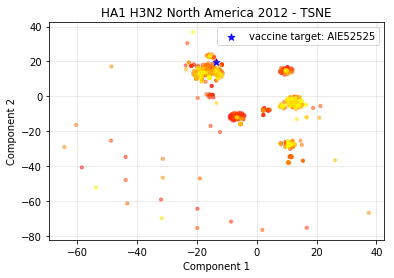

In [54]:
tsne = manifold.TSNE(n_components=2, metric='precomputed')
tsne_results = tsne.fit(distMat_2012)
tsne_pos = tsne_results.embedding_
tsne_divergence = tsne_results.kl_divergence_
tsne_iter = tsne_results.n_iter_
print('Kullback-Leibler divergence after optimization: '+str(tsne_divergence))
print('Number of iterations run: '+str(tsne_iter))

pts = plt.scatter(tsne_pos[:, 0], tsne_pos[:, 1], color=color_array, cmap=autumn_map, s=10, alpha=0.5)
plt.scatter(tsne_pos[1, 0], tsne_pos[1, 1], color='b', marker='*', s=50, alpha=0.9, label=('vaccine target: ' + str(labels[1])))

plt.legend()    
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(alpha=0.3)
plt.title('HA1 H3N2 North America 2012 - TSNE - PAM250')
#plt.colorbar()
#plt.colors.Colormap(labels, N=10)
plt.show()

# Analyzing North American strains collected in 2012 with FLU

In [ ]:
D_2012_FLU = Distance("NA_2012_aligned_seq.fa", "FLU")
labels_2012, sequences_2012 = trim("NA_2012_aligned_seq.fa")

In [ ]:
test = D_2012_FLU.seq_dist(sequences_2012[0], sequences_2012[1])
print(test)

numSeq_2012 = sequences_2012.shape[0]

In [ ]:
distMat_2012 = D_2012_FLU.dist_mat()

In [ ]:
mds = manifold.MDS(n_components=2, max_iter=8000, dissimilarity="precomputed", n_jobs=1)

results = mds.fit(distMat_2012)
pos = results.embedding_
stress = results.stress_
print('stress: ' +str(stress))

cmap = mpl.cm.autumn # more options found here: https://matplotlib.org/tutorials/colors/colormaps.html
autumn_map = plt.get_cmap('autumn')
color_array = np.zeros((numSeq_2012,4))
for ii in range(0,numSeq_2012):
    color_array[ii,:] = cmap(ii / float(numSeq_2012))

pts = plt.scatter(pos[:, 0], pos[:, 1], color=color_array, cmap=autumn_map, s=10, alpha=0.5)
plt.scatter(pos[1, 0], pos[1, 1], color='b', marker='*', s=50, alpha=0.9, label=('vaccine target: ' + str(labels[1])))

plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(alpha=0.3)
plt.title('HA1 sequences of H3N2 virus: North America - 2012 - FLU')
#plt.colorbar(pts)
#plt.colors.Colormap(labels, N=10)
plt.show()

In [ ]:
tsne = manifold.TSNE(n_components=2, metric='precomputed')
tsne_results = tsne.fit(distMat_2012)
tsne_pos = tsne_results.embedding_
tsne_divergence = tsne_results.kl_divergence_
tsne_iter = tsne_results.n_iter_
print('Kullback-Leibler divergence after optimization: '+str(tsne_divergence))
print('Number of iterations run: '+str(tsne_iter))

pts = plt.scatter(tsne_pos[:, 0], tsne_pos[:, 1], color=color_array, cmap=autumn_map, s=10, alpha=0.5)
plt.scatter(tsne_pos[1, 0], tsne_pos[1, 1], color='b', marker='*', s=50, alpha=0.9, label=('vaccine target: ' + str(labels[1])))

plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(alpha=0.3)
plt.title('HA1 H3N2 North America 2012 - TSNE - FLU')
#plt.colorbar()
#plt.colors.Colormap(labels, N=10)
plt.show()

# Analyzing all sequences collected from 2012 through 2015

In [15]:
D = Distance("world_aligned_2012-2015.fa")
labels, sequences = trim("world_aligned_2012-2015.fa")

using path from server to load sequences
using path from server to load sequences


In [ ]:
test = D.seq_dist(sequences[0], sequences[1])
print(test)

distMat = D.dist_mat()

numSeq = sequences.shape[0]

0.008014535706162963
calculating the full distance matrix based on PAM250


In [ ]:
mds = manifold.MDS(n_components=2, max_iter=8000, dissimilarity="precomputed", n_jobs=1)

results = mds.fit(distMat)
pos = results.embedding_
stress = results.stress_
print('stress: ' +str(stress))

cmap = mpl.cm.autumn # more options found here: https://matplotlib.org/tutorials/colors/colormaps.html
autumn_map = plt.get_cmap('autumn')
plt.subplot(111)
for ii in range(0,numSeq):
    if (ii == 1): # second element in list represents the 2012 vaccine: AIE52525 Texas/50/2012/H3N2
        plt.scatter(pos[ii, 0], pos[ii, 1], color='b', marker='*', s=50, alpha=1.0, label=labels[ii])
    else:    
        plt.scatter(pos[ii, 0], pos[ii, 1], color=cmap(ii / float(numSeq)), cmap=autumn_map, s=10, alpha=0.4, label=labels[ii])
    
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(alpha=0.3)
plt.title('HA1 H3N2 World 2012-2015 - MDS')
#plt.colorbar(autumn_map)
#plt.colors.Colormap(labels, N=10)
plt.show()
